<a href="https://colab.research.google.com/github/lephuocdat2000/NhapmonCV/blob/master/Canbanghistogram_anhmau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

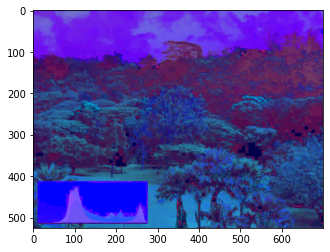

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Buoc 1: Doc anh tu file
img = cv2.imread('/content/mcbryde-garden-low-contrast.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)




<BarContainer object of 256 artists>

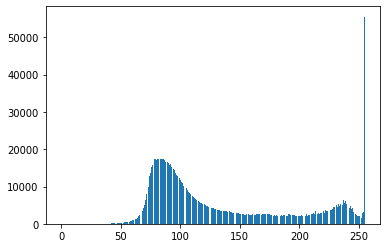

In [16]:
# Buoc 2: Tinh anh histogram
img_vec = img.reshape(-1)
def cal_hist(img_vec):
    hist = np.zeros(256, np.int)
    values, counts = np.unique(img_vec, return_counts=True)
    for i, val in enumerate(values):
        hist[val] = counts[i]
    return hist
hist = cal_hist(img_vec)
plt.bar(range(0,256), hist)

In [17]:
# Buoc 3: Tinh CDF
cdf = np.cumsum(hist)
# Buoc 4: Tinh h(v)
cdf_min = np.min(cdf)
h = (cdf - cdf_min) / (cdf[-1] - cdf_min) * 255
h = h.astype(np.int)

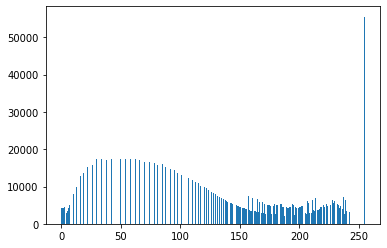

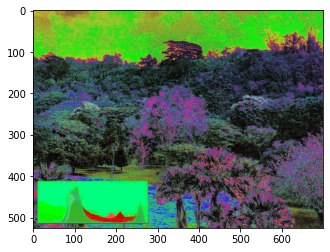

In [18]:
# Buoc 5: can ban anh bien gia tri mau v --> h(v)
img_eq = img.copy()
for v in range(256):
    img_eq[img==v] = h[v]

img_vec = img_eq.reshape(-1)
hist = cal_hist(img_vec)
plt.bar(range(0,256), hist)
img_rgb=cv2.cvtColor(img_eq,cv2.COLOR_HSV2RGB)
plt.show()
plt.imshow(img_rgb)